 # <font color='red' style='font-family:font_family name'><center> Telecom Project</center></font>

 ## <font color='violet'> 1- Unsupervised machine learning </font>

In [208]:
#Importing useful modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc as pyodbc
import seaborn as sns

In [209]:
#connection = pyodbc.connect('DRIVER={SQL Server Native Client 11.0};SERVER=localhost;PORT=1433;DATABASE=DW_Telecom;Trusted_connection=yes')
#cursor = connection.cursor()
#cursor.execute("select Answer from FaitSurvey f join DimClient c  on f.Client_FK=c.Client_PK ")
#rows = cursor.fetchall()
#for row in rows:
#    print(row)

In [210]:
#Loading data frame 
df = pd.read_excel('final_excel_data_5555.xls')
#The first 3 rows of our dataframe
df.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,3 - [4] S0.1 Code ville,4 - [12] S0.2. Sexe :,7 - [14] Date de passation du questionnaire,"8 - [199] S1. Combien de salariés travaillent dans votre entreprise, c’est-à-dire tous sites confondus, y compris celui où on se trouve ?",10 - [15] S1ter. Dans quel secteur d’activité travaillez-vous ?,"15 - [20] S5. Et quel est l’opérateur principal, c'est-à-dire, l’opérateur mobile chez qui vous avez souscrit le plus de lignes mobiles ?",20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?,...,130 - [159] Q37.3 La solution qui vous a été proposée,132 - [160] Q39.1 La compréhension de votre demande,133 - [161] Q39.2 La réponse qui vous a été apportée,134 - [162] Q39.3 La rapidité du traitement de votre demande,135 - [163] Q39.4 La résolution de votre problème/demande grâce à ce message sur les réseaux sociaux ou cette visite sur le site Internet de l’opérateur,"142 - [174] Q41. Globalement, sur une échelle de 1 à 10, comment évaluez-vous le ou les systèmes de facturation proposés par [V15] ?",143 - [176] Q42.1 Le délai de réception de la facture,144 - [177] Q42.2 La facilité à comprendre la facture,145 - [178] Q42.3 La justesse de votre facture,"147 - [179] Q44. Globalement, sur une échelle de 1 à 10, comment évaluez-vous la qualité du service de distribution de crédit centralisé ?"
0,0,0,0,TUNIS,H,14/03/2019,20,Industrie,Ooredoo,1,...,1,4,5,5,4,4,5,6,7,4
1,1,1,1,TUNIS,H,16/03/2019,10,Industrie,Orange,3,...,1,4,5,5,4,4,5,6,7,4
2,2,2,2,TUNIS,F,16/03/2019,11,Services,Orange,3,...,1,4,5,5,4,4,5,6,7,4


In [211]:
#Information about our DataFrame including the index dtype and column dtypes, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Columns: 101 entries, Unnamed: 0 to 147 - [179] Q44. Globalement, sur une échelle de 1 à 10, comment évaluez-vous la qualité du service de distribution de crédit centralisé ?
dtypes: int64(96), object(5)
memory usage: 1.1+ MB


In [212]:
#The number of observations and features
df.shape

(1421, 101)

In [213]:
#Visualizing some basic statistical details like median, mean, std etc
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1421.0,710.000000,410.351678,0.0,355.0,710.0,1065.0,1420.0
Unnamed: 0.1,1421.0,710.000000,410.351678,0.0,355.0,710.0,1065.0,1420.0
Unnamed: 0.1.1,1421.0,710.000000,410.351678,0.0,355.0,710.0,1065.0,1420.0
"8 - [199] S1. Combien de salariés travaillent dans votre entreprise, c’est-à-dire tous sites confondus, y compris celui où on se trouve ?",1421.0,22.679099,12.489366,10.0,11.0,20.0,30.0,50.0
20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?,1421.0,1.872625,1.094784,1.0,1.0,1.0,3.0,5.0
...,...,...,...,...,...,...,...,...
"142 - [174] Q41. Globalement, sur une échelle de 1 à 10, comment évaluez-vous le ou les systèmes de facturation proposés par [V15] ?",1421.0,6.670654,1.723055,1.0,6.0,7.0,8.0,11.0
143 - [176] Q42.1 Le délai de réception de la facture,1421.0,6.557354,1.971375,1.0,6.0,7.0,8.0,11.0
144 - [177] Q42.2 La facilité à comprendre la facture,1421.0,6.747361,1.789701,1.0,6.0,7.0,8.0,11.0
145 - [178] Q42.3 La justesse de votre facture,1421.0,6.613652,1.793748,1.0,6.0,7.0,7.0,11.0


In [214]:
df=df.loc[df["15 - [20] S5. Et quel est l’opérateur principal, c'est-à-dire, l’opérateur mobile chez qui vous avez souscrit le plus de lignes mobiles ? "] == 'Orange']

In [215]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,3 - [4] S0.1 Code ville,4 - [12] S0.2. Sexe :,7 - [14] Date de passation du questionnaire,"8 - [199] S1. Combien de salariés travaillent dans votre entreprise, c’est-à-dire tous sites confondus, y compris celui où on se trouve ?",10 - [15] S1ter. Dans quel secteur d’activité travaillez-vous ?,"15 - [20] S5. Et quel est l’opérateur principal, c'est-à-dire, l’opérateur mobile chez qui vous avez souscrit le plus de lignes mobiles ?",20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?,...,130 - [159] Q37.3 La solution qui vous a été proposée,132 - [160] Q39.1 La compréhension de votre demande,133 - [161] Q39.2 La réponse qui vous a été apportée,134 - [162] Q39.3 La rapidité du traitement de votre demande,135 - [163] Q39.4 La résolution de votre problème/demande grâce à ce message sur les réseaux sociaux ou cette visite sur le site Internet de l’opérateur,"142 - [174] Q41. Globalement, sur une échelle de 1 à 10, comment évaluez-vous le ou les systèmes de facturation proposés par [V15] ?",143 - [176] Q42.1 Le délai de réception de la facture,144 - [177] Q42.2 La facilité à comprendre la facture,145 - [178] Q42.3 La justesse de votre facture,"147 - [179] Q44. Globalement, sur une échelle de 1 à 10, comment évaluez-vous la qualité du service de distribution de crédit centralisé ?"
1,1,1,1,TUNIS,H,16/03/2019,10,Industrie,Orange,3,...,1,4,5,5,4,4,5,6,7,4
2,2,2,2,TUNIS,F,16/03/2019,11,Services,Orange,3,...,1,4,5,5,4,4,5,6,7,4
3,3,3,3,TUNIS,F,16/03/2019,11,Services,Orange,3,...,1,4,5,5,4,4,5,6,7,4
4,4,4,4,TUNIS,F,16/03/2019,11,Services,Orange,1,...,1,4,5,5,4,4,5,6,7,4
5,5,5,5,TUNIS,F,16/03/2019,11,Services,Orange,1,...,1,4,5,5,4,4,5,6,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,1405,1405,1405,TUNIS,H,18/03/2019,15,Commerce (détail),Orange,3,...,1,4,4,4,4,5,1,5,5,4
1406,1406,1406,1406,TUNIS,H,22/03/2019,15,Commerce (détail),Orange,1,...,1,4,4,4,4,5,1,5,5,4
1416,1416,1416,1416,TUNIS,F,23/03/2019,24,Industrie,Orange,3,...,1,4,4,4,4,3,1,1,1,4
1417,1417,1417,1417,TUNIS,F,22/03/2019,50,Services,Orange,1,...,1,4,4,4,4,7,6,7,6,4


In [216]:
#Deletion of unnecessary features
df=df.drop(columns=['Unnamed: 0','Unnamed: 0.1.1',
         'Unnamed: 0.1',
        '3 - [4] S0.1 Code ville',
        '4 - [12] S0.2. Sexe :',
        '7 - [14] Date de passation du questionnaire',
        '8 - [199] S1. Combien de salariés travaillent dans votre entreprise, c’est-à-dire tous sites confondus, y compris celui où on se trouve ?',
        '10 - [15] S1ter. Dans quel secteur d’activité travaillez-vous ?',
        "15 - [20] S5. Et quel est l’opérateur principal, c'est-à-dire, l’opérateur mobile chez qui vous avez souscrit le plus de lignes mobiles ? "],axis=1)


In [217]:
#Feature list
df.columns.all

<bound method Index._add_logical_methods.<locals>._make_logical_function.<locals>.logical_func of Index(['20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?',
       '21 - [26] Q01A. Recommanderiez-vous les services de téléphonie mobile de votre opérateur principal [V15]  à vos collègues ou partenaire commercial ?',
       '22 - [27] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?',
       '23 - [29] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?',
       '24 - [30] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?',
       '27 - [34] A TOUS ',
       '28 - [35] Q02. Comment évaluez-vous le COUT GLOBAL d

### As we can see it's going to be difficult to work with those columns names, that's why we will change those names into numbers to simplify the future visualisations

In [218]:
df = df.values
df = pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,3,5,9,6,5,5,6,5,5,6,...,1,4,5,5,4,4,5,6,7,4
1,3,5,9,6,5,5,6,5,5,6,...,1,4,5,5,4,4,5,6,7,4
2,3,5,9,6,5,5,6,5,5,6,...,1,4,5,5,4,4,5,6,7,4
3,1,6,9,6,5,6,6,6,5,6,...,1,4,5,5,4,4,5,6,7,4
4,1,6,9,6,5,6,6,6,5,6,...,1,4,5,5,4,4,5,6,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,3,6,5,6,1,8,8,8,8,7,...,1,4,4,4,4,5,1,5,5,4
455,1,3,5,6,1,4,4,7,4,4,...,1,4,4,4,4,5,1,5,5,4
456,3,3,7,6,5,4,6,7,1,1,...,1,4,4,4,4,3,1,1,1,4
457,1,8,7,6,5,7,7,7,6,7,...,1,4,4,4,4,7,6,7,6,4


In [219]:
df = df.rename(columns={x:y for x,y in zip(df.columns,range(1,len(df.columns)+1))})
df

,1,2,3,4,5,6,7,8,9,10,...,83,84,85,86,87,88,89,90,91,92
0,3,5,9,6,5,5,6,5,5,6,...,1,4,5,5,4,4,5,6,7,4
1,3,5,9,6,5,5,6,5,5,6,...,1,4,5,5,4,4,5,6,7,4
2,3,5,9,6,5,5,6,5,5,6,...,1,4,5,5,4,4,5,6,7,4
3,1,6,9,6,5,6,6,6,5,6,...,1,4,5,5,4,4,5,6,7,4
4,1,6,9,6,5,6,6,6,5,6,...,1,4,5,5,4,4,5,6,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,3,6,5,6,1,8,8,8,8,7,...,1,4,4,4,4,5,1,5,5,4
455,1,3,5,6,1,4,4,7,4,4,...,1,4,4,4,4,5,1,5,5,4
456,3,3,7,6,5,4,6,7,1,1,...,1,4,4,4,4,3,1,1,1,4
457,1,8,7,6,5,7,7,7,6,7,...,1,4,4,4,4,7,6,7,6,4


### But we are still able to restore the names of the questions if needed

In [220]:
connection = pyodbc.connect('DRIVER={SQL Server Native Client 11.0};SERVER=localhost;PORT=1433;DATABASE=DW_Telecom;Trusted_connection=yes')
cursor = connection.cursor()
cursor.execute("select * from DimQuestion ")
DimQuestion = cursor.fetchall()
for row in DimQuestion:
    print(row)

(283, 1, '20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?')
(284, 2, '21 - [26] Q01A. Recommanderiez-vous les services de téléphonie mobile de votre opérateur principal [V15]  à vos collègues ou partenaire commercial ?')
(285, 3, '22 - [27] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?')
(286, 4, '23 - [29] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?')
(287, 5, '24 - [30] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?')
(288, 6, '27 - [34] A TOUS ')
(289, 7, '28 - [35] Q02. Comment évaluez-vous le COUT GLOBAL des offres et services de [V15] ?  Ce coût inclut le coût de votre/vos contrat/s, les

In [221]:
#extracting the name of question with the number "2"
DimQuestion[3][2]# "1" +1 is the number of question  // "2" is the position in the tuple

'23 - [29] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?'

### <font color='pink'> KMeans Clustering </font>

In [222]:
for i in np.arange(1,df.shape[1]+1):
    for j in np.arange(0,df.shape[0]):
        if df[i][j]==11:
            df[i][j]=5

In [223]:
Quality_Price = df.loc[:,7:8]
Quality_Price

,7,8
0,6,5
1,6,5
2,6,5
3,6,6
4,6,6
...,...,...
454,8,8
455,4,7
456,6,7
457,7,7


In [224]:
Quality_Price = Quality_Price.mean(axis=1).round()

In [225]:
Quality_Price

0      6.0
1      6.0
2      6.0
3      6.0
4      6.0
      ... 
454    8.0
455    6.0
456    6.0
457    7.0
458    6.0
Length: 459, dtype: float64

In [226]:
RelationClient = df.loc[:,9:15]
RelationClient

,9,10,11,12,13,14,15
0,5,6,5,5,4,4,4
1,5,6,5,5,4,4,4
2,5,6,5,5,4,4,4
3,5,6,4,6,5,7,6
4,5,6,4,6,5,7,6
...,...,...,...,...,...,...,...
454,8,7,8,8,8,8,8
455,4,4,1,1,1,1,1
456,1,1,1,1,1,1,1
457,6,7,6,7,6,6,7


In [227]:
RelationClient = RelationClient.mean(axis=1).round()

In [228]:
RelationClient

0      5.0
1      5.0
2      5.0
3      6.0
4      6.0
      ... 
454    8.0
455    2.0
456    1.0
457    6.0
458    6.0
Length: 459, dtype: float64

In [229]:
Commercial = df.loc[:,16:38]
Commercial

,16,17,18,19,20,21,22,23,24,25,...,29,30,31,32,33,34,35,36,37,38
0,1,2,1,2,8,8,6,6,6,6,...,9,9,9,9,8,5,6,5,5,5
1,1,2,1,2,8,8,6,6,6,6,...,9,9,9,9,8,5,6,5,5,5
2,1,2,1,2,8,8,6,6,6,6,...,9,9,9,9,8,5,6,5,5,5
3,1,2,1,2,8,8,6,6,6,6,...,9,9,9,9,8,5,6,5,5,5
4,1,2,1,2,8,8,6,6,6,6,...,9,9,9,9,8,5,6,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,1,1,2,5,4,7,7,3,2,2,...,5,1,5,5,1,7,6,8,8,8
455,1,1,2,2,4,1,1,3,2,2,...,5,1,5,5,1,5,4,1,1,8
456,1,1,1,5,3,1,1,3,2,2,...,1,1,1,1,1,1,2,3,4,2
457,1,2,1,5,8,1,7,3,2,2,...,1,1,1,1,1,5,6,5,6,7


In [230]:
Commercial.drop([16,17,19],axis=1,inplace=True)
Commercial

D:\Users\abdel\anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,1,8,8,6,6,6,6,6,9,8,9,9,9,9,8,5,6,5,5,5
1,1,8,8,6,6,6,6,6,9,8,9,9,9,9,8,5,6,5,5,5
2,1,8,8,6,6,6,6,6,9,8,9,9,9,9,8,5,6,5,5,5
3,1,8,8,6,6,6,6,6,9,8,9,9,9,9,8,5,6,5,5,5
4,1,8,8,6,6,6,6,6,9,8,9,9,9,9,8,5,6,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,2,4,7,7,3,2,2,2,1,7,5,1,5,5,1,7,6,8,8,8
455,2,4,1,1,3,2,2,2,1,7,5,1,5,5,1,5,4,1,1,8
456,1,3,1,1,3,2,2,2,1,1,1,1,1,1,1,1,2,3,4,2
457,1,8,1,7,3,2,2,2,1,1,1,1,1,1,1,5,6,5,6,7


In [231]:
for i in np.arange(0,df.shape[0]):
    if df[18][i]==1:
        df[18][i]=10
    elif df[18][i]==2:
        df[18][i]=1
    elif df[18][i]==3:
         df[18][i]=5

In [232]:
Commercial = Commercial.mean(axis=1).round()

In [233]:
Commercial

0      7.0
1      7.0
2      7.0
3      7.0
4      7.0
      ... 
454    5.0
455    3.0
456    2.0
457    3.0
458    3.0
Length: 459, dtype: float64

In [234]:
Reseau = df.loc[:,39:53]
Reseau

,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,5,4,6,6,5,5,5,2,5,7,7,5,6,6,7
1,5,4,6,6,5,5,5,2,5,7,7,5,6,6,7
2,5,4,6,6,5,5,5,2,5,7,7,5,6,6,7
3,5,4,6,6,5,5,5,2,5,7,7,5,6,6,7
4,5,4,6,6,5,5,5,2,5,7,7,5,6,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,8,4,7,7,8,7,7,2,5,1,1,1,6,1,1
455,1,3,1,5,5,3,5,1,5,1,1,1,1,1,1
456,3,2,1,1,1,1,1,1,5,1,1,1,1,1,1
457,6,4,6,7,6,7,6,2,5,7,7,1,1,1,1


In [235]:
for i in np.arange(0,df.shape[0]):
    if df[40][i]==2:
        df[40][i]=4
    elif df[40][i]==3:
        df[40][i]=7
    elif df[40][i]==4:
         df[40][i]=10

In [236]:
for i in np.arange(0,df.shape[0]):
    if df[46][i]==2:
        df[46][i]=10

In [237]:
df.loc[:,46].value_counts()

10    350
1     109
Name: 46, dtype: int64

In [238]:
Reseau = Reseau.mean(axis=1).round()

In [239]:
Reseau

0      6.0
1      6.0
2      6.0
3      6.0
4      6.0
      ... 
454    5.0
455    3.0
456    2.0
457    5.0
458    5.0
Length: 459, dtype: float64

In [240]:
Internet=df.loc[:,54:92]
Internet

,54,55,56,57,58,59,60,61,62,63,...,83,84,85,86,87,88,89,90,91,92
0,7,7,7,6,7,6,8,7,6,6,...,1,4,5,5,4,4,5,6,7,4
1,7,7,7,6,7,6,8,7,6,6,...,1,4,5,5,4,4,5,6,7,4
2,7,7,7,6,7,6,8,7,6,6,...,1,4,5,5,4,4,5,6,7,4
3,7,7,7,6,7,6,8,7,6,6,...,1,4,5,5,4,4,5,6,7,4
4,7,7,7,6,7,6,8,7,6,6,...,1,4,5,5,4,4,5,6,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,5,7,8,7,7,8,6,7,8,3,...,1,4,4,4,4,5,1,5,5,4
455,5,7,8,5,7,8,5,7,8,3,...,1,4,4,4,4,5,1,5,5,4
456,5,7,8,5,7,8,5,7,8,3,...,1,4,4,4,4,3,1,1,1,4
457,7,7,8,6,7,8,7,7,8,7,...,1,4,4,4,4,7,6,7,6,4


In [241]:
for i in np.arange(0,df.shape[0]):
    if df[75][i]==1:
        df[75][i]=10
    elif df[75][i]==2:
        df[75][i]=1

In [242]:
Internet = Internet.mean(axis=1).round()

In [243]:
Internet

0      6.0
1      6.0
2      6.0
3      6.0
4      6.0
      ... 
454    5.0
455    4.0
456    4.0
457    5.0
458    5.0
Length: 459, dtype: float64

In [244]:
dfff = pd.DataFrame({'Quality_Price': Quality_Price, 'RelationClient': RelationClient, 'Commercial': Commercial, 'Reseau': Reseau, 'Internet':Internet})

In [245]:
dfff

,Quality_Price,RelationClient,Commercial,Reseau,Internet
0,6.0,5.0,7.0,6.0,6.0
1,6.0,5.0,7.0,6.0,6.0
2,6.0,5.0,7.0,6.0,6.0
3,6.0,6.0,7.0,6.0,6.0
4,6.0,6.0,7.0,6.0,6.0
...,...,...,...,...,...
454,8.0,8.0,5.0,5.0,5.0
455,6.0,2.0,3.0,3.0,4.0
456,6.0,1.0,2.0,2.0,4.0
457,7.0,6.0,3.0,5.0,5.0


In [246]:
#Loading the KMeans class from cluster module of the sklearn library,
from sklearn.cluster import KMeans
inertia =[]
K = np.arange(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(dfff)
    inertia.append(km.inertia_)

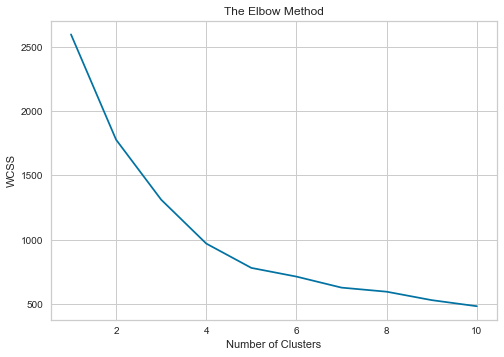

In [247]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(dfff)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.6425740780746777
For n_clusters = 3 The average silhouette_score is : 0.30364617353370343
For n_clusters = 4 The average silhouette_score is : 0.3551478745623803
For n_clusters = 5 The average silhouette_score is : 0.33525301299494015
For n_clusters = 6 The average silhouette_score is : 0.34988917345512227
For n_clusters = 7 The average silhouette_score is : 0.34962422330481924
For n_clusters = 8 The average silhouette_score is : 0.33985821694256035
For n_clusters = 9 The average silhouette_score is : 0.3598811503684536
For n_clusters = 10 The average silhouette_score is : 0.34083914031729573


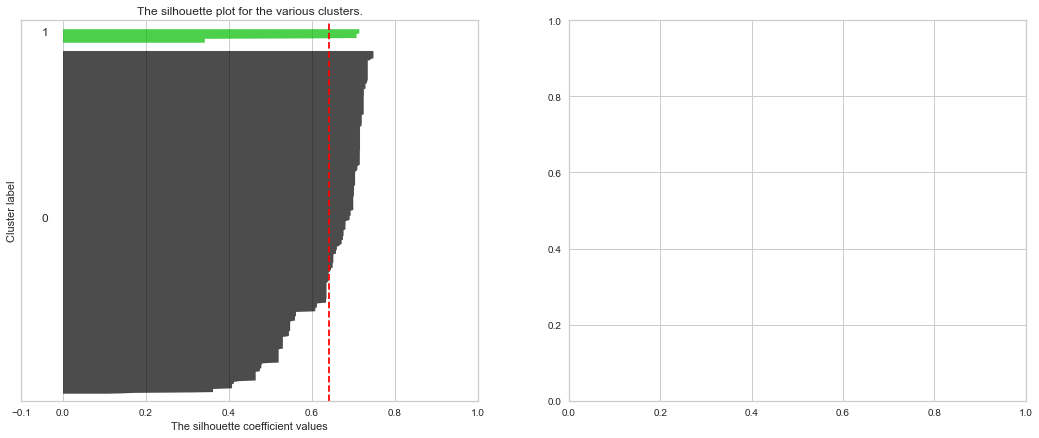

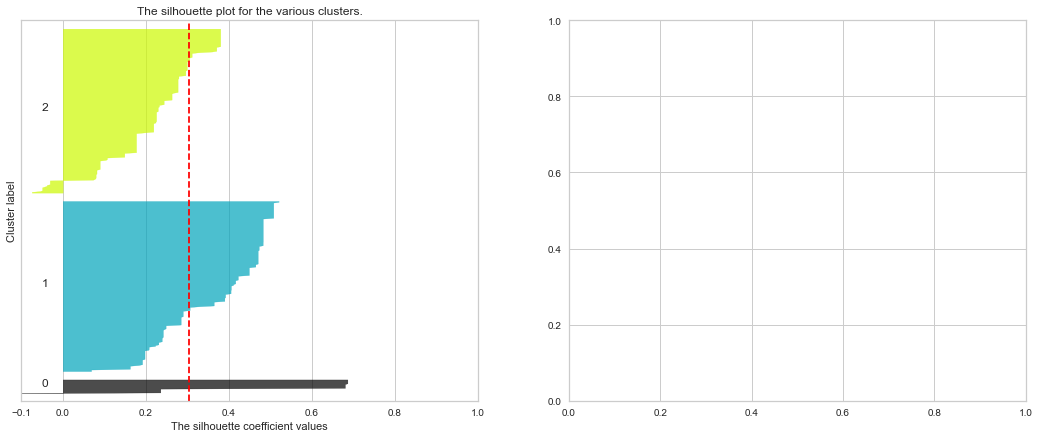

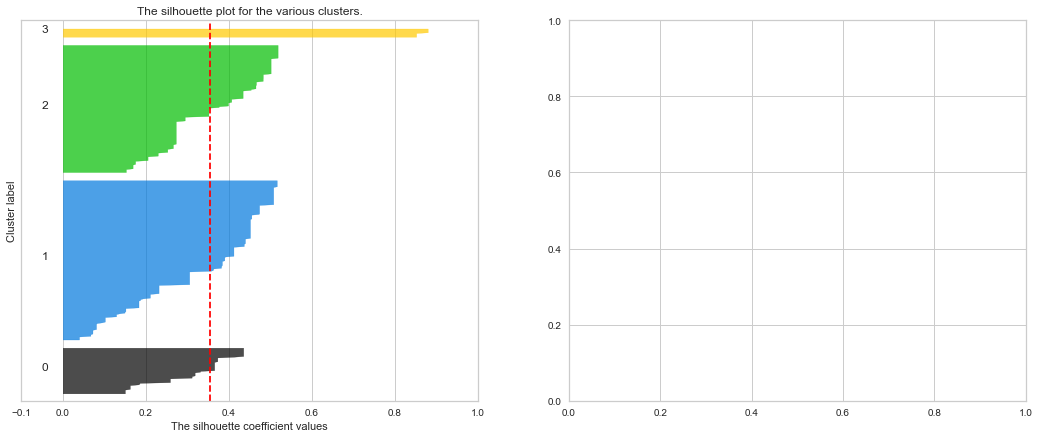

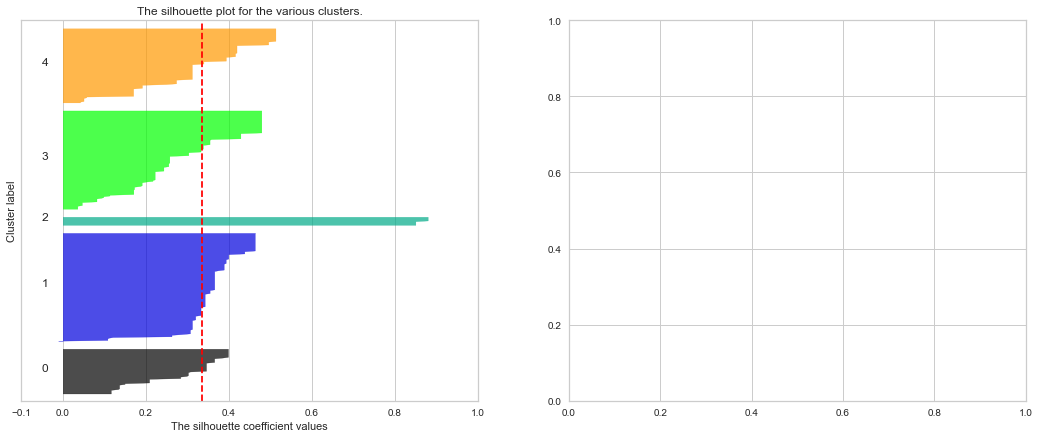

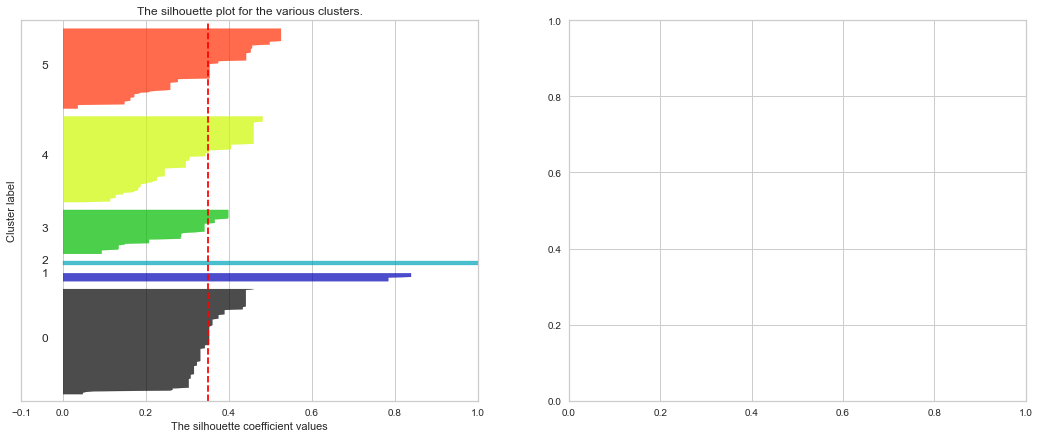

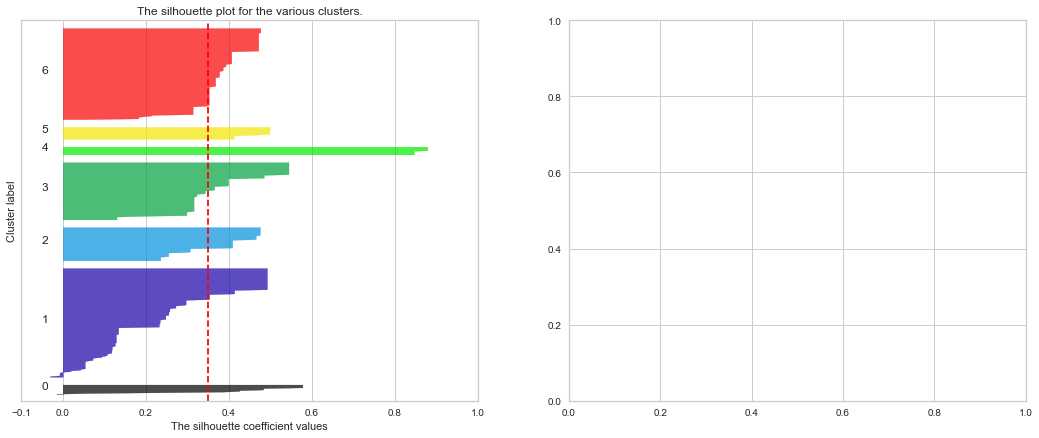

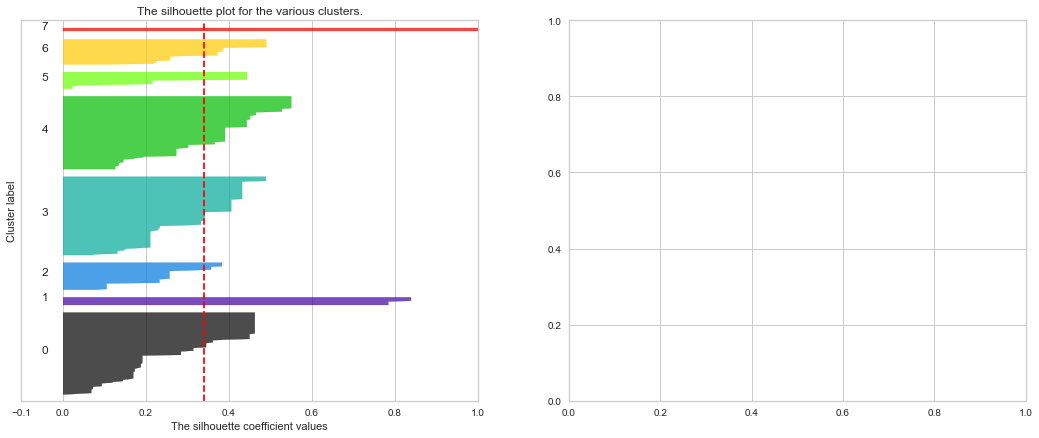

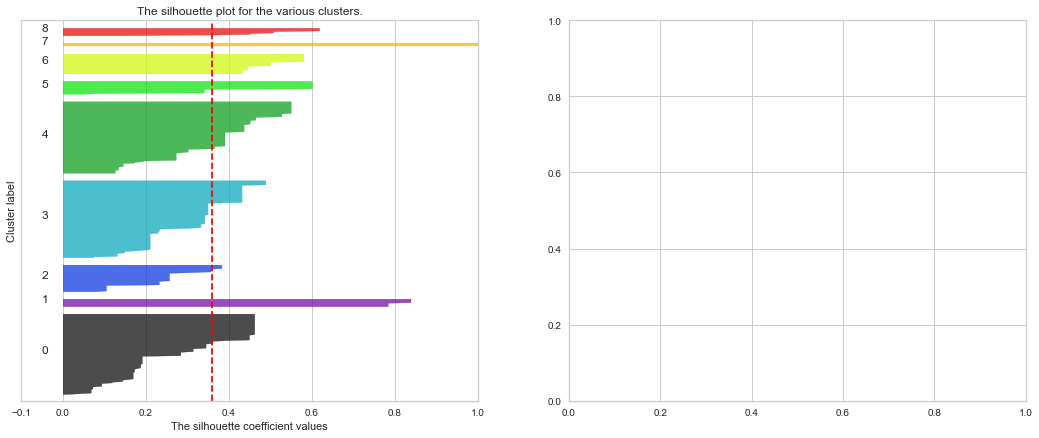

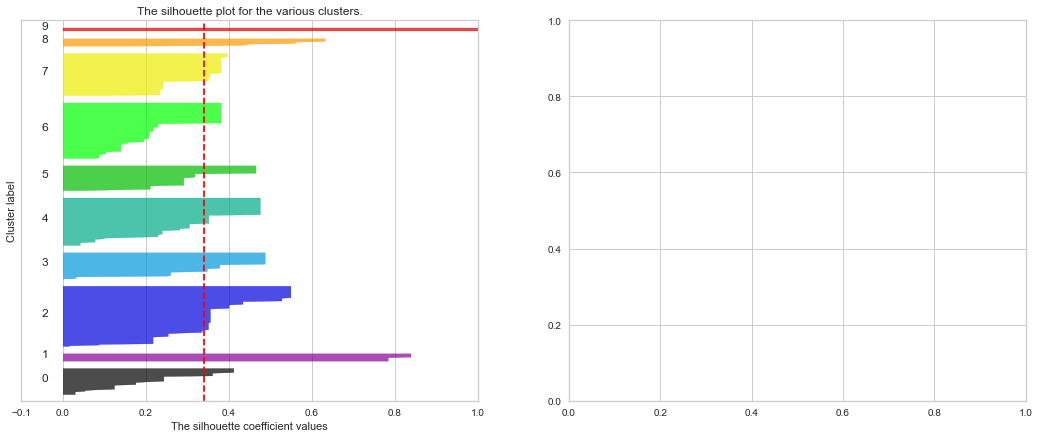

In [248]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dfff) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dfff)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dfff, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dfff, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.show()

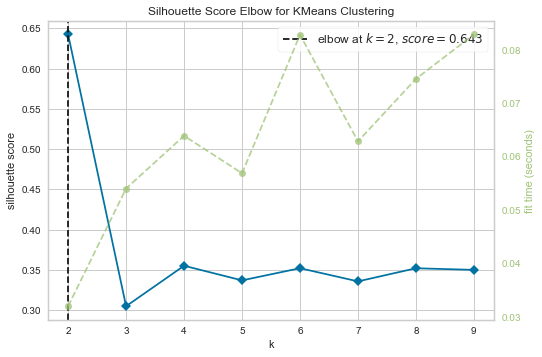

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [249]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(dfff)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

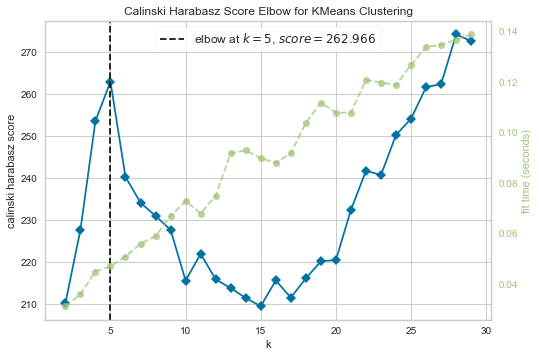

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [250]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(dfff)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

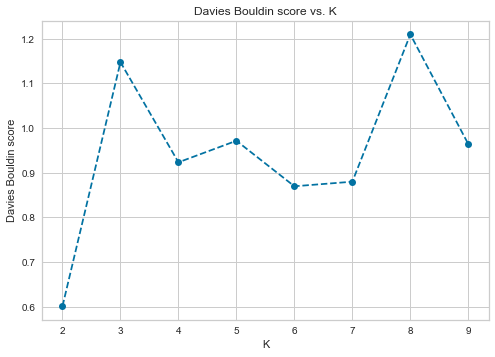

In [251]:
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)
# Then fit the model to your data using the fit method
    model = kmeans.fit_predict(dfff)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(dfff, model)
    
    return score
scores = []
centers = list(range(2,10))
for center in centers:
    scores.append(get_kmeans_score(dfff, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

In [252]:
kmeans = KMeans(n_clusters=2,random_state=2 )
kmeans.fit(dfff)

KMeans(n_clusters=2, random_state=2)

In [253]:
labels = kmeans.labels_

In [254]:
for i in range(len(labels)):
    print('Index:',i,'Label:',labels[i])

Index: 0 Label: 1
Index: 1 Label: 1
Index: 2 Label: 1
Index: 3 Label: 1
Index: 4 Label: 1
Index: 5 Label: 1
Index: 6 Label: 1
Index: 7 Label: 0
Index: 8 Label: 1
Index: 9 Label: 1
Index: 10 Label: 1
Index: 11 Label: 1
Index: 12 Label: 1
Index: 13 Label: 1
Index: 14 Label: 1
Index: 15 Label: 1
Index: 16 Label: 1
Index: 17 Label: 1
Index: 18 Label: 0
Index: 19 Label: 0
Index: 20 Label: 1
Index: 21 Label: 1
Index: 22 Label: 1
Index: 23 Label: 1
Index: 24 Label: 1
Index: 25 Label: 1
Index: 26 Label: 1
Index: 27 Label: 1
Index: 28 Label: 1
Index: 29 Label: 1
Index: 30 Label: 1
Index: 31 Label: 1
Index: 32 Label: 1
Index: 33 Label: 1
Index: 34 Label: 1
Index: 35 Label: 1
Index: 36 Label: 1
Index: 37 Label: 1
Index: 38 Label: 1
Index: 39 Label: 1
Index: 40 Label: 1
Index: 41 Label: 1
Index: 42 Label: 1
Index: 43 Label: 1
Index: 44 Label: 1
Index: 45 Label: 1
Index: 46 Label: 1
Index: 47 Label: 1
Index: 48 Label: 1
Index: 49 Label: 1
Index: 50 Label: 1
Index: 51 Label: 1
Index: 52 Label: 1
Ind

In [255]:
l =pd.DataFrame(labels)
l.value_counts()

1    441
0     18
dtype: int64

In [256]:
exp1 = pd.DataFrame(dfff.loc[19,:])
exp1.value_counts()

19 
2.0    2
6.0    1
4.0    1
1.0    1
dtype: int64

<AxesSubplot:xlabel='19', ylabel='count'>

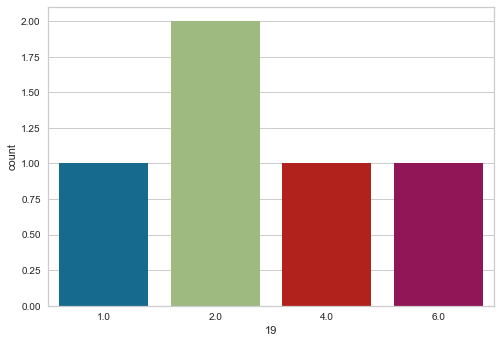

In [257]:
sns.countplot(x=dfff.loc[19,:])

In [258]:
labels[19]

0

In [259]:
exp2 = pd.DataFrame(dfff.loc[314,:])
exp2.value_counts()

314
7.0    4
8.0    1
dtype: int64

<AxesSubplot:xlabel='314', ylabel='count'>

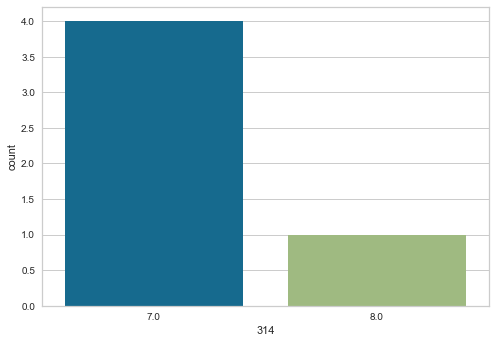

In [260]:
sns.countplot(x=dfff.loc[314,:])

In [261]:
labels[314]

1

<AxesSubplot:xlabel='350', ylabel='count'>

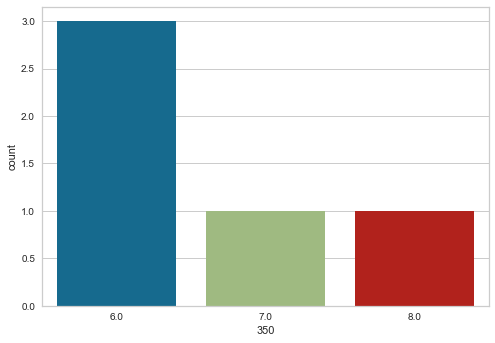

In [262]:
sns.countplot(x=dfff.loc[350,:])

In [263]:
labels[350]

1

<AxesSubplot:xlabel='159', ylabel='count'>

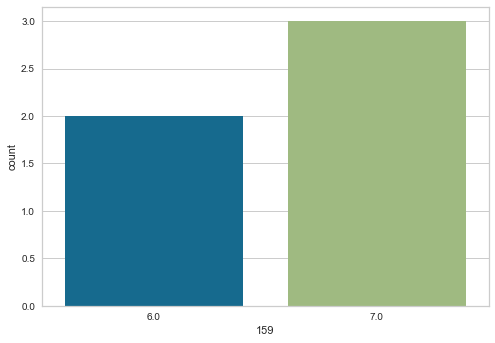

In [264]:
sns.countplot(x=dfff.loc[159,:])

In [265]:
labels[159]

1

<AxesSubplot:xlabel='197', ylabel='count'>

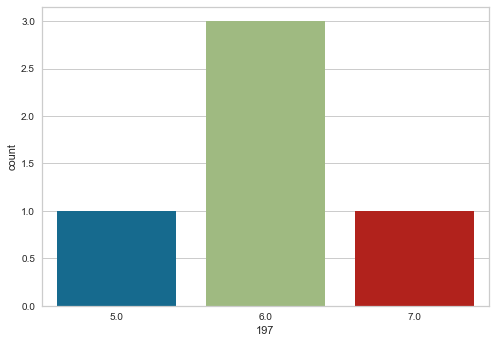

In [266]:
sns.countplot(x=dfff.loc[197,:])

In [267]:
labels[197]

1

<AxesSubplot:xlabel='7', ylabel='count'>

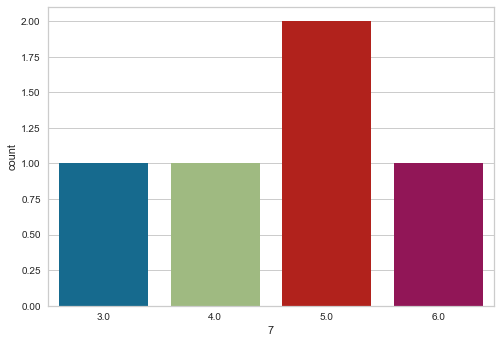

In [268]:
sns.countplot(x=dfff.loc[7,:])

In [269]:
labels[7]

0

<AxesSubplot:xlabel='377', ylabel='count'>

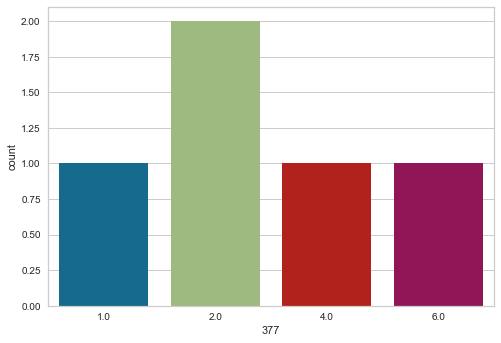

In [270]:
sns.countplot(x=dfff.loc[377,:])

In [271]:
labels[377]

0

In [272]:
l = pd.DataFrame(labels)
l

,0
0,1
1,1
2,1
3,1
4,1
...,...
454,1
455,0
456,0
457,1


In [273]:
dfc = pd.concat([dfff, l], axis=1)
dfc

,Quality_Price,RelationClient,Commercial,Reseau,Internet,0
0,6.0,5.0,7.0,6.0,6.0,1
1,6.0,5.0,7.0,6.0,6.0,1
2,6.0,5.0,7.0,6.0,6.0,1
3,6.0,6.0,7.0,6.0,6.0,1
4,6.0,6.0,7.0,6.0,6.0,1
...,...,...,...,...,...,...
454,8.0,8.0,5.0,5.0,5.0,1
455,6.0,2.0,3.0,3.0,4.0,0
456,6.0,1.0,2.0,2.0,4.0,0
457,7.0,6.0,3.0,5.0,5.0,1


In [274]:
df1=dfc.loc[dfc[0] == 0]
df1

,Quality_Price,RelationClient,Commercial,Reseau,Internet,0
7,4.0,3.0,5.0,6.0,5.0,0
18,6.0,2.0,3.0,3.0,4.0,0
19,6.0,1.0,2.0,2.0,4.0,0
86,4.0,3.0,5.0,6.0,5.0,0
97,6.0,2.0,3.0,3.0,4.0,0
98,6.0,1.0,2.0,2.0,4.0,0
174,4.0,3.0,5.0,6.0,5.0,0
185,6.0,2.0,3.0,3.0,4.0,0
186,6.0,1.0,2.0,2.0,4.0,0
253,4.0,3.0,5.0,6.0,5.0,0


In [275]:
dfch=df1.drop([0],axis=1)
dfch

,Quality_Price,RelationClient,Commercial,Reseau,Internet
7,4.0,3.0,5.0,6.0,5.0
18,6.0,2.0,3.0,3.0,4.0
19,6.0,1.0,2.0,2.0,4.0
86,4.0,3.0,5.0,6.0,5.0
97,6.0,2.0,3.0,3.0,4.0
98,6.0,1.0,2.0,2.0,4.0
174,4.0,3.0,5.0,6.0,5.0
185,6.0,2.0,3.0,3.0,4.0
186,6.0,1.0,2.0,2.0,4.0
253,4.0,3.0,5.0,6.0,5.0


In [279]:
#Loading the KMeans class from cluster module of the sklearn library,
from sklearn.cluster import KMeans
inertia =[]
K = np.arange(1,4)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(dfch)
    inertia.append(km.inertia_)

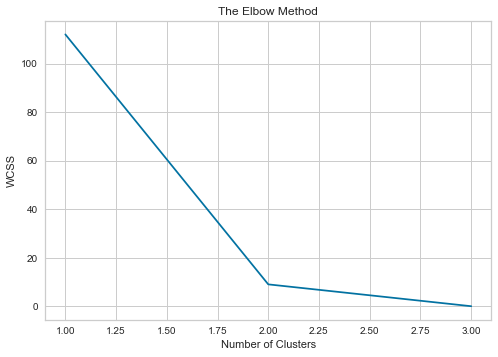

In [281]:
wcss=[]
for i in range(1,4):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(dfch)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,4),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.8737447327249972
For n_clusters = 3 The average silhouette_score is : 1.0


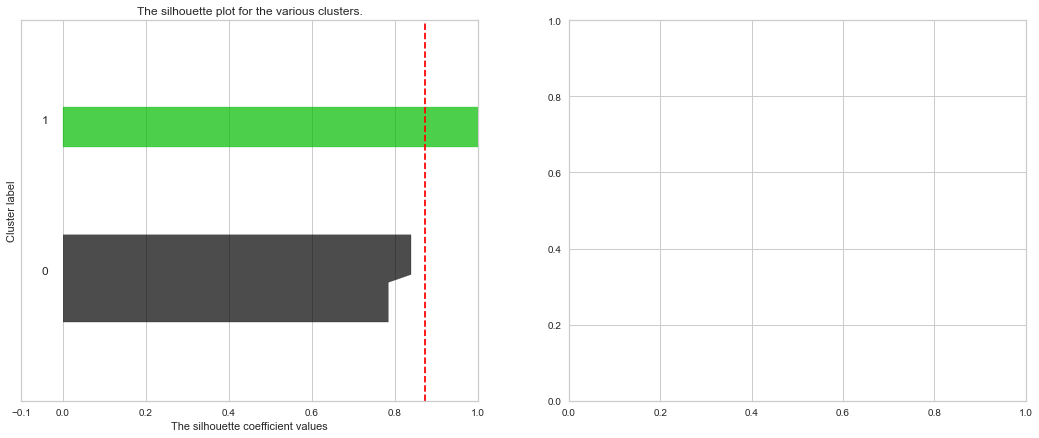

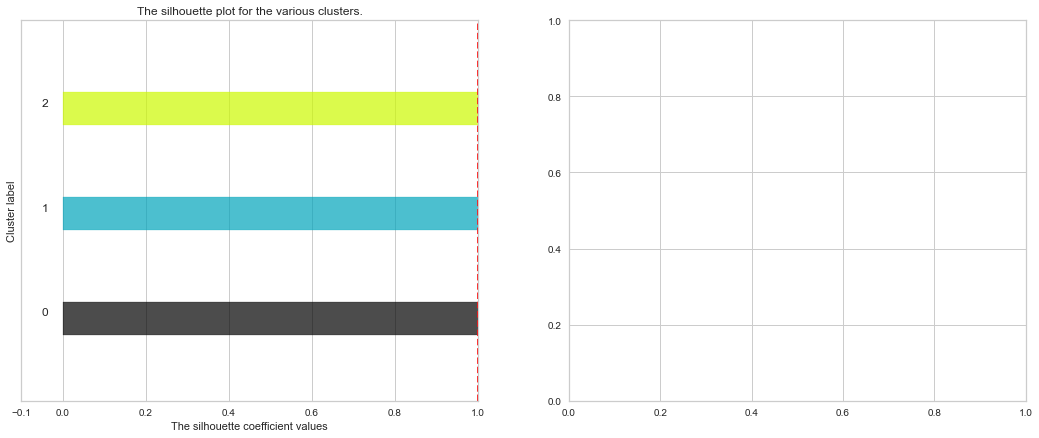

In [283]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
for n_clusters in range(2,4):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dfch) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dfch)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dfch, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dfch, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.show()

D:\Users\abdel\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
D:\Users\abdel\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


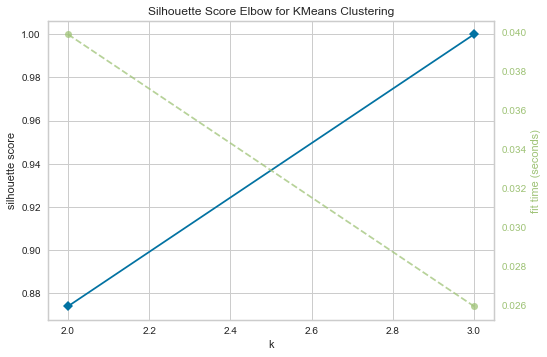

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [287]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,4),metric='silhouette', timings= True)
visualizer.fit(dfch)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

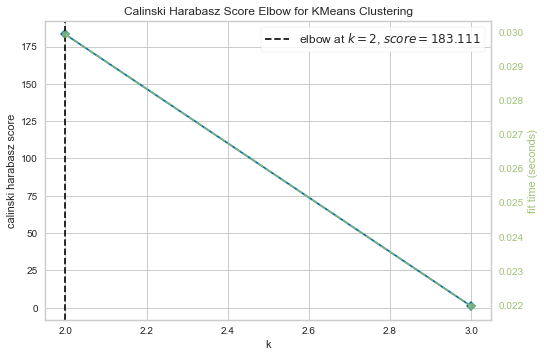

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [291]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,4),metric='calinski_harabasz', timings= True)
visualizer.fit(dfch)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

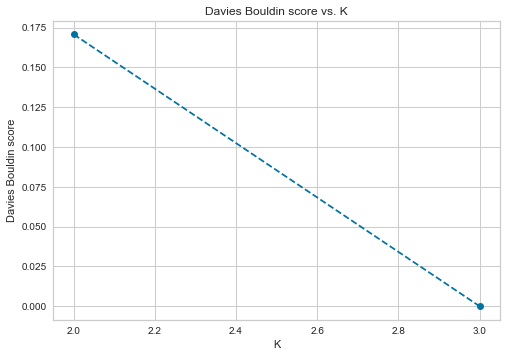

In [297]:
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)
# Then fit the model to your data using the fit method
    model = kmeans.fit_predict(dfch)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(dfch, model)
    
    return score
scores = []
centers = list(range(2,4))
for center in centers:
    scores.append(get_kmeans_score(dfch, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

In [298]:
kmeans = KMeans(n_clusters=3,random_state=2 )
kmeans.fit(dfch)

KMeans(n_clusters=3, random_state=2)

In [299]:
labels = kmeans.labels_

In [300]:
for i in range(len(labels)):
    print('Index:',dfch.index[i],'Label:',labels[i])

Index: 7 Label: 0
Index: 18 Label: 2
Index: 19 Label: 1
Index: 86 Label: 0
Index: 97 Label: 2
Index: 98 Label: 1
Index: 174 Label: 0
Index: 185 Label: 2
Index: 186 Label: 1
Index: 253 Label: 0
Index: 264 Label: 2
Index: 265 Label: 1
Index: 365 Label: 0
Index: 376 Label: 2
Index: 377 Label: 1
Index: 444 Label: 0
Index: 455 Label: 2
Index: 456 Label: 1


In [301]:
l =pd.DataFrame(labels)
l.value_counts()

2    6
1    6
0    6
dtype: int64

<AxesSubplot:xlabel='7', ylabel='count'>

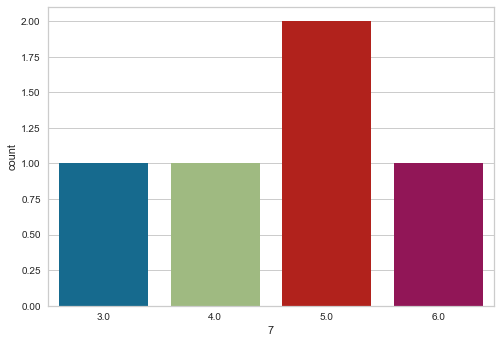

In [302]:
sns.countplot(x=dfch.loc[7,:])

In [306]:
labels[0]

0

<AxesSubplot:xlabel='19', ylabel='count'>

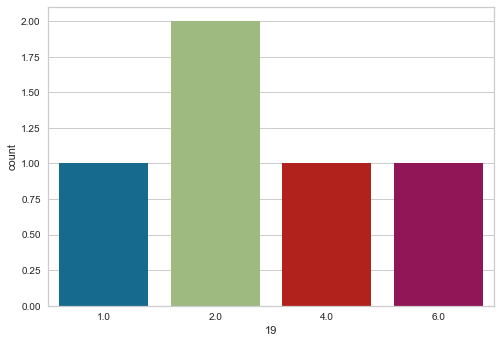

In [304]:
sns.countplot(x=dfch.loc[19,:])

In [307]:
labels[2]

1

<AxesSubplot:xlabel='18', ylabel='count'>

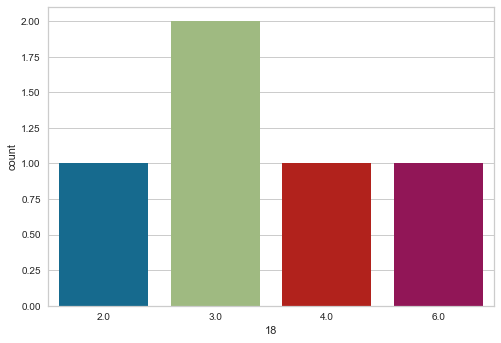

In [308]:
sns.countplot(x=dfch.loc[18,:])

In [309]:
labels[1]

2

In [310]:
l = pd.DataFrame(labels)
l

,0
0,0
1,2
2,1
3,0
4,2
5,1
6,0
7,2
8,1
9,0


In [311]:
dfch = dfch.values

In [313]:
dfch = pd.DataFrame(dfch)
dfch

,0,1,2,3,4
0,4.0,3.0,5.0,6.0,5.0
1,6.0,2.0,3.0,3.0,4.0
2,6.0,1.0,2.0,2.0,4.0
3,4.0,3.0,5.0,6.0,5.0
4,6.0,2.0,3.0,3.0,4.0
5,6.0,1.0,2.0,2.0,4.0
6,4.0,3.0,5.0,6.0,5.0
7,6.0,2.0,3.0,3.0,4.0
8,6.0,1.0,2.0,2.0,4.0
9,4.0,3.0,5.0,6.0,5.0


In [314]:
dfch['churn']=l
dfch

,0,1,2,3,4,churn
0,4.0,3.0,5.0,6.0,5.0,0
1,6.0,2.0,3.0,3.0,4.0,2
2,6.0,1.0,2.0,2.0,4.0,1
3,4.0,3.0,5.0,6.0,5.0,0
4,6.0,2.0,3.0,3.0,4.0,2
5,6.0,1.0,2.0,2.0,4.0,1
6,4.0,3.0,5.0,6.0,5.0,0
7,6.0,2.0,3.0,3.0,4.0,2
8,6.0,1.0,2.0,2.0,4.0,1
9,4.0,3.0,5.0,6.0,5.0,0


In [315]:
dfch.rename(columns={0:'Quality_Price',1:'RelationClient',2:'Commercial',3:'Reseau',4:'Internet'},inplace=True)

In [316]:
dfch

,Quality_Price,RelationClient,Commercial,Reseau,Internet,churn
0,4.0,3.0,5.0,6.0,5.0,0
1,6.0,2.0,3.0,3.0,4.0,2
2,6.0,1.0,2.0,2.0,4.0,1
3,4.0,3.0,5.0,6.0,5.0,0
4,6.0,2.0,3.0,3.0,4.0,2
5,6.0,1.0,2.0,2.0,4.0,1
6,4.0,3.0,5.0,6.0,5.0,0
7,6.0,2.0,3.0,3.0,4.0,2
8,6.0,1.0,2.0,2.0,4.0,1
9,4.0,3.0,5.0,6.0,5.0,0


In [319]:
dfch0=dfch.loc[dfch['churn'] == 0]

In [320]:
dfch0.describe().T

,count,mean,std,min,25%,50%,75%,max
Quality_Price,6.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
RelationClient,6.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
Commercial,6.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
Reseau,6.0,6.0,0.0,6.0,6.0,6.0,6.0,6.0
Internet,6.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
churn,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [321]:
for i in dfch0.columns:
    print(dfch0[i].value_counts())

4.0    6
Name: Quality_Price, dtype: int64
3.0    6
Name: RelationClient, dtype: int64
5.0    6
Name: Commercial, dtype: int64
6.0    6
Name: Reseau, dtype: int64
5.0    6
Name: Internet, dtype: int64
0    6
Name: churn, dtype: int64


In [323]:
dfch1=dfch.loc[dfch['churn'] == 1]

In [324]:
dfch1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quality_Price,6.0,6.0,0.0,6.0,6.0,6.0,6.0,6.0
RelationClient,6.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Commercial,6.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
Reseau,6.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
Internet,6.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
churn,6.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [325]:
for i in dfch1.columns:
    print(dfch1[i].value_counts())

6.0    6
Name: Quality_Price, dtype: int64
1.0    6
Name: RelationClient, dtype: int64
2.0    6
Name: Commercial, dtype: int64
2.0    6
Name: Reseau, dtype: int64
4.0    6
Name: Internet, dtype: int64
1    6
Name: churn, dtype: int64


In [326]:
dfch2=dfch.loc[dfch['churn'] == 2]

In [327]:
dfch2.describe().T

,count,mean,std,min,25%,50%,75%,max
Quality_Price,6.0,6.0,0.0,6.0,6.0,6.0,6.0,6.0
RelationClient,6.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
Commercial,6.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
Reseau,6.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
Internet,6.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
churn,6.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0


In [328]:
for i in dfch2.columns:
    print(dfch2[i].value_counts())

6.0    6
Name: Quality_Price, dtype: int64
2.0    6
Name: RelationClient, dtype: int64
3.0    6
Name: Commercial, dtype: int64
3.0    6
Name: Reseau, dtype: int64
4.0    6
Name: Internet, dtype: int64
2    6
Name: churn, dtype: int64
